# Chronic Kidney Disease Prediction

## Table of Contents
1. [Problem Statement](#section1)</br>
2. [Data Loading, Exploration (Investigation) and Pre-Processing](#section2)</br>
    - 2.1 [Import Packages](#section201)</br>
    - 2.2 [Load data from CSV file](#section202)</br>
    - 2.3 [Data Profling](#section203)</br>
    - 2.4 [Removing the unwanted columns/features](#section204)</br>
3. [Data Visualization](#section3)</br>
    - 3.1 [Verifying correlations between different features](#section301)</br>
    - 3.2 [Heat Map and Correlation of parameters after data cleaning](#section302)</br>
    - 3.3 [Pairwise plots](#section303)</br>
    - 3.4 [Histograms](#section304)</br>
    - 3.5 [More Visualizations](#section305)</br>
4. [Model Training and Prediction](#section4)</br>
    - 4.1 [Splitting X and y into training and test datasets](#section401)</br>        
    - 4.2 [Applying Logistic Regression](#section402)</br>        
    - 4.3 [Calculating Precision, Recall, F1, Average Precision scores](#section403)</br>        
    - 4.4 [Using formaula for Accuracy, Precision & Recall from previous semeter DM class](#section404)</br>        
    - 4.5 [Comparing accuracy, precision and recall of MANUAL with scikit-learn values](#section405)</br>        
    - 4.6 [Output to CSV file](#section406)</br>        
    - 4.6 [Decision Boundry](#section407)</br>

5. [Conclusion](#section5)</br>  

<a id=section1></a>
## 1. Problem Statement
<b>C</b>hronic <b>K</b>idney <b>D</b>isease (CKD) means your kidneys are damaged and can’t filter blood the way they should. The disease is called “chronic” because the damage to your kidneys happens slowly over a long period of time. This damage can cause wastes to build up in your body. CKD can also cause other health problems.

<a id=section2></a>
## 2. Data Loading, Exploration (Investigation) and Pre-Processing

- Given dataset hasd __24 health related attributes of 400 patients__
- Using the information of the 158 patients with complete records to predict the outcome (i.e. whether one has chronic kidney disease) of the remaining 242 patients (with missing values in their records).
- Below is the column with their definitions

| Column Name          | Description                                               |
| -------------        |--------------                                             | 
| id                   | Unique Patient Id                                         | 
| age                  | Age of the Patient                                        |  
| bp                   | Blood Pressure                                            | 
| sg                   | Specific Gravity                                          | 
| al                   | Albumin                                                   |
| su                   | Sugar                                                     |
| rbc                  | Red Blood Cells                                           |
| pc                   | Pus Cells                                                 |
| pcc                  | Pus Cell Clumps                                           |
| ba                   | Bacteria                                                  |
| bgr                  | Blood Glucose Random                                      |
| bu                   | Blood Urea                                                |
| sc                   | Serum Creatinine                                          |
| sod                  | Sodium                                                    |
| pot                  | Potassium                                                 |
| hemo                 | Hemoglobin                                                |
| pcv                  | Packed Cell Volume                                        |
| wc                   | White Blood Cell Count                                    |
| rc                   | Red Blood Cell Count                                      |
| htn                  | Hypertension                                              |
| dm                   | Diabetes Mellitus                                         |
| cad                  | Coronary Artery Disease                                   |
| appet                | Appetite                                                  |
| pe                   | Pedal Edema                                               |
| ane                  | Anemia                                                    |
| classification       | Class which provides information if CDK or not            |

<a id=section201></a>
#### Import Packages  

In [71]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pylab as plt
import seaborn as sb
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

<a id=section202></a>
#### Load data from CSV file 

In [73]:
ckd_data_df = pd.read_csv('Dataset/kidney_disease.csv')
ckd_data_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [74]:
ckd_data_df.shape

(400, 26)

In [75]:
ckd_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [76]:
ckd_data_df.classification.unique() 

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

<a id=section203></a>
#### Data Profling

In [77]:
profile = pandas_profiling.ProfileReport(ckd_data_df)
profile.to_file("Dataset/ckd_preprocessing.html")

- Profiling file will contains the overview of Datapoints and Varibales before Data Cleaning process. 
- It shows consolidate report about missing values, correlations and etc.. which helps to perfrom the data processing in     a better way.
- And also, there is 400 Observations of 26 variable. There are missing values in data, So we need data cleaning before we dig in to some EDA or any Data Sciecne methodology.

<a id=section204></a>
#### Removing the unwanted columns/features

**PREPARE DATA**

**1) 3 unique values appear in the dataset. However, there is no value called  "ckd\t. ".   Remove it from the dataset so that dataset would have consitent data.**

**2) The "id" parameter will not work for classification, so remove this parameter from the dataset.**

**3) The classification(Class) has values of cdk and notcdk, normalize it to have like, if the value is "ckd" is 1, if not equal to 0.**

**4) Verify dataset with "NaN" values in each feature.**

**5) Map text of "Red Blood Cells", "Pus Cell", "Pus Cell Clumps", "Bacteria", "Hypertension", "Diabetes Mellitus", "Coronary Artery Disease", "Appetite", "Pedal Edema" and "Anemia" to 1/0.**

In [78]:
ckd_data_df.classification=ckd_data_df.classification.replace("ckd\t","ckd") 

In [79]:
ckd_data_df.classification.unique() # issue of above #1 has been solved

array(['ckd', 'notckd'], dtype=object)

In [80]:
ckd_data_df.drop("id", axis=1, inplace=True) # issue of above #2 has been solved.

In [81]:
#verify if the id column has been dropped or not
ckd_data_df.head() 

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


##### Rename the feature names for human understandable (for non-medical personal)

In [82]:
ckd_data_df.columns=['Age','BloodPressure','SpecificGravity','Albumin','Sugar','RedBloodCells','PusCell', 'PusCellClumps', 'Bacteria', 'BloodGlucoseRandom', 'BloodUrea', 'SerumCreatinine', 'Sodium', 'Potassium', 'Hemoglobin',  'PackedCellVolume', 'WhiteBloodCellCount', 'RedBloodCellCount', 'Hypertension', 'DiabetesMellitus', 'CoronaryArteryDisease', 'Appetite', 'PedalEdema', 'Anemia', 'Classification']

Text(0.5, 1, 'Heatmap for Missing Value')

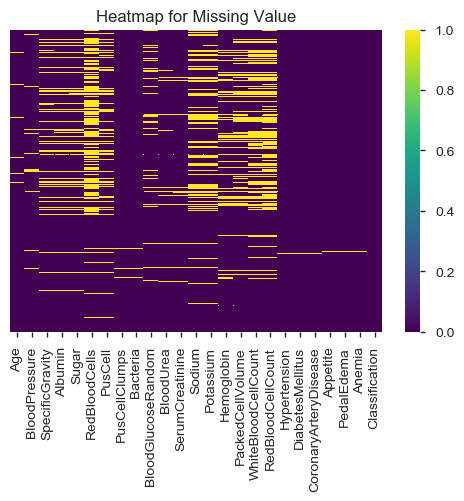

In [83]:
plt.figure(dpi=100)
sb.heatmap(ckd_data_df.isnull(), yticklabels=False, cmap='viridis')
plt.title('Heatmap for Missing Value')

In [84]:
ckd_data_df.Classification=[1 if each=="ckd" else 0 for each in ckd_data_df.Classification]

In [85]:
#check if the values of the class column for cdk and notcdk has been updated or not
ckd_data_df.head() 

,Age,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCells,PusCell,PusCellClumps,Bacteria,BloodGlucoseRandom,...,PackedCellVolume,WhiteBloodCellCount,RedBloodCellCount,Hypertension,DiabetesMellitus,CoronaryArteryDisease,Appetite,PedalEdema,Anemia,Classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


##### Heat Map and Correlation of parameters before data cleaning

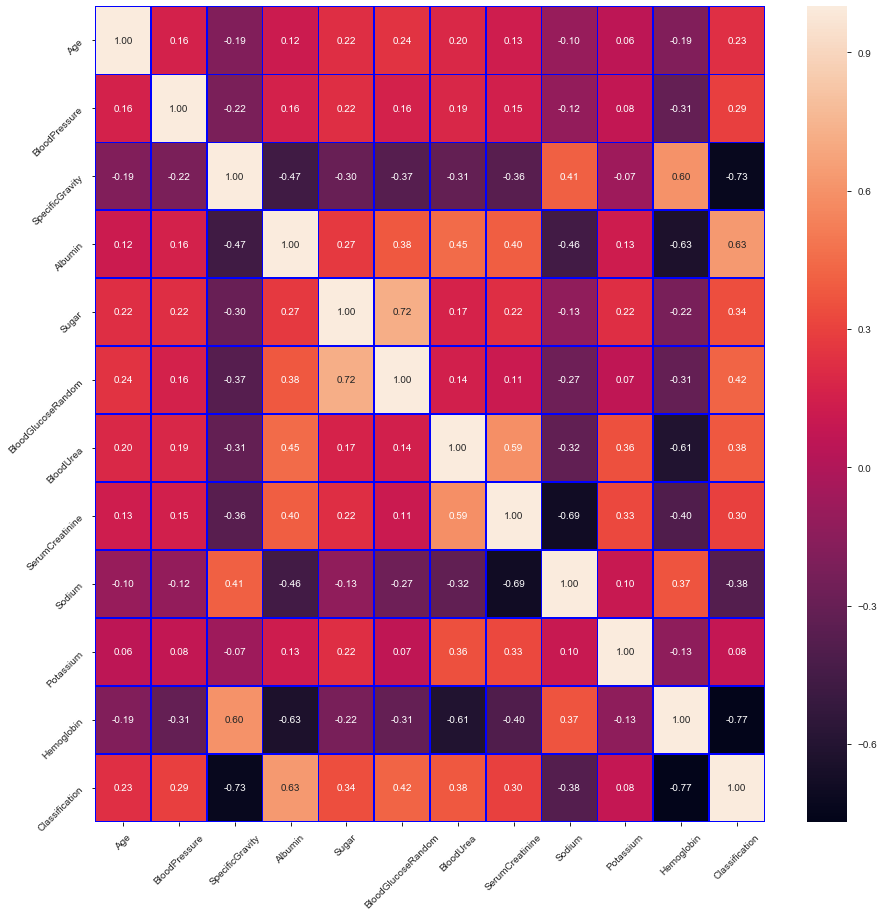

In [86]:
f,ax = plt.subplots(figsize=(15,15))
sb.heatmap(ckd_data_df.corr(), annot = True, fmt =".2f",ax = ax, linewidths = 0.5, linecolor = "blue")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [87]:
ckd_data_df.isnull().sum() 
ckd_data_df = ckd_data_df.dropna(axis=0)
print(ckd_data_df.shape)

ckd_data_df.index=range(0,len(ckd_data_df),1)
ckd_data_df.head()
print(ckd_data_df.shape)

ckd_data_df.head()

(158, 25)
(158, 25)


,Age,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCells,PusCell,PusCellClumps,Bacteria,BloodGlucoseRandom,...,PackedCellVolume,WhiteBloodCellCount,RedBloodCellCount,Hypertension,DiabetesMellitus,CoronaryArteryDisease,Appetite,PedalEdema,Anemia,Classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


##### Heatmap after Cleaning

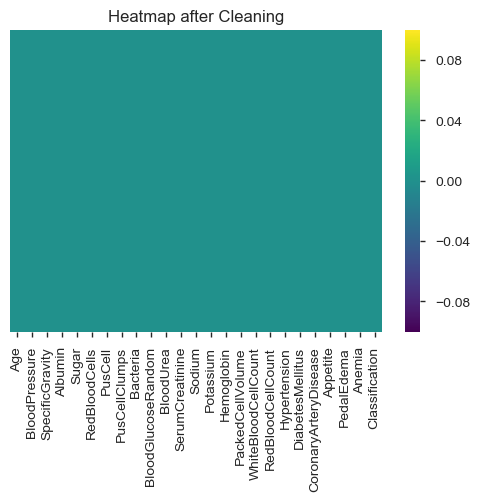

In [88]:
plt.figure(dpi=100)
plt.title("Heatmap after Cleaning")
sb.heatmap(ckd_data_df.isnull(),yticklabels=False,cmap='viridis')

###### Resolving issue#4 of the PREPARE DATA

In [89]:
# Data few features data are not correctly present, so corrected them.
ckd_data_df["WhiteBloodCellCount"] = ckd_data_df["WhiteBloodCellCount"].replace("\t6200",6200)
ckd_data_df["WhiteBloodCellCount"] = ckd_data_df["WhiteBloodCellCount"].replace("\t8400",8400) 

ckd_data_df["PackedCellVolume"] = ckd_data_df["PackedCellVolume"].astype(int)
ckd_data_df["WhiteBloodCellCount"] = ckd_data_df["WhiteBloodCellCount"].astype(int)
ckd_data_df["RedBloodCellCount"] = ckd_data_df["RedBloodCellCount"].astype(float)
ckd_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
Age                      158 non-null float64
BloodPressure            158 non-null float64
SpecificGravity          158 non-null float64
Albumin                  158 non-null float64
Sugar                    158 non-null float64
RedBloodCells            158 non-null object
PusCell                  158 non-null object
PusCellClumps            158 non-null object
Bacteria                 158 non-null object
BloodGlucoseRandom       158 non-null float64
BloodUrea                158 non-null float64
SerumCreatinine          158 non-null float64
Sodium                   158 non-null float64
Potassium                158 non-null float64
Hemoglobin               158 non-null float64
PackedCellVolume         158 non-null int32
WhiteBloodCellCount      158 non-null int32
RedBloodCellCount        158 non-null float64
Hypertension             158 non-null object
DiabetesMellitus         158 n

In [90]:
# Below is the check for the number of features (columns) that are of the object data type if yes, then 
# move on to process them into numeric form
dtype_object = ckd_data_df.select_dtypes(include=['object'])
dtype_object.head()

,RedBloodCells,PusCell,PusCellClumps,Bacteria,Hypertension,DiabetesMellitus,CoronaryArteryDisease,Appetite,PedalEdema,Anemia
0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
1,abnormal,abnormal,present,notpresent,yes,yes,no,poor,no,yes
2,abnormal,abnormal,present,notpresent,yes,yes,no,poor,yes,no
3,normal,abnormal,present,present,yes,yes,yes,poor,yes,no
4,abnormal,abnormal,notpresent,notpresent,yes,yes,yes,poor,yes,yes


In [91]:
for x in dtype_object.columns:
    print("{} unique values:".format(x),ckd_data_df[x].unique())
    print("*"*20)

RedBloodCells unique values: ['normal' 'abnormal']
********************
PusCell unique values: ['abnormal' 'normal']
********************
PusCellClumps unique values: ['present' 'notpresent']
********************
Bacteria unique values: ['notpresent' 'present']
********************
Hypertension unique values: ['yes' 'no']
********************
DiabetesMellitus unique values: ['no' 'yes']
********************
CoronaryArteryDisease unique values: ['no' 'yes']
********************
Appetite unique values: ['poor' 'good']
********************
PedalEdema unique values: ['yes' 'no']
********************
Anemia unique values: ['yes' 'no']
********************


###### Resolving issue#5 of the PREPARE DATA 

In [92]:
dic_enums = {
        "RedBloodCells": {
        "abnormal":1,
        "normal": 0,
    },
        "PusCell":{
        "abnormal":1,
        "normal": 0,
    },
        "PusCellClumps":{
        "present":1,
        "notpresent":0,
    },
        "Bacteria":{
        "notpresent":0,
        "present": 1,
    },
        "Hypertension":{
        "yes":1,
        "no": 0,
    },
        "DiabetesMellitus":{
        "yes":1,
        "no":0,
    },
        "CoronaryArteryDisease":{
        "yes":1,
        "no": 0,
    },
        "Appetite":{
        "good":1,
        "poor": 0,
    },
        "PedalEdema":{
        "yes":1,
        "no":0,
    },
        "Anemia":{
        "yes":1,
        "no":0,
    }
}

In [93]:
ckd_data_df = ckd_data_df.replace(dic_enums)

In [94]:
#Verify if the data has been changed or not
ckd_data_df.head()

,Age,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCells,PusCell,PusCellClumps,Bacteria,BloodGlucoseRandom,...,PackedCellVolume,WhiteBloodCellCount,RedBloodCellCount,Hypertension,DiabetesMellitus,CoronaryArteryDisease,Appetite,PedalEdema,Anemia,Classification
0,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
1,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29,12100,3.7,1,1,0,0,0,1,1
2,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32,4500,3.8,1,1,0,0,1,0,1
3,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16,11000,2.6,1,1,1,0,1,0,1
4,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24,9200,3.2,1,1,1,0,1,1,1


In [95]:
for x in dtype_object.columns:
    print("{} unique values:".format(x),ckd_data_df[x].unique())
    print("*"*20)

RedBloodCells unique values: [0 1]
********************
PusCell unique values: [1 0]
********************
PusCellClumps unique values: [1 0]
********************
Bacteria unique values: [0 1]
********************
Hypertension unique values: [1 0]
********************
DiabetesMellitus unique values: [0 1]
********************
CoronaryArteryDisease unique values: [0 1]
********************
Appetite unique values: [0 1]
********************
PedalEdema unique values: [1 0]
********************
Anemia unique values: [1 0]
********************


<a id=section3></a>
## 3. Data Visualization

<a id=section301></a>
#### Verifying correlations between different features

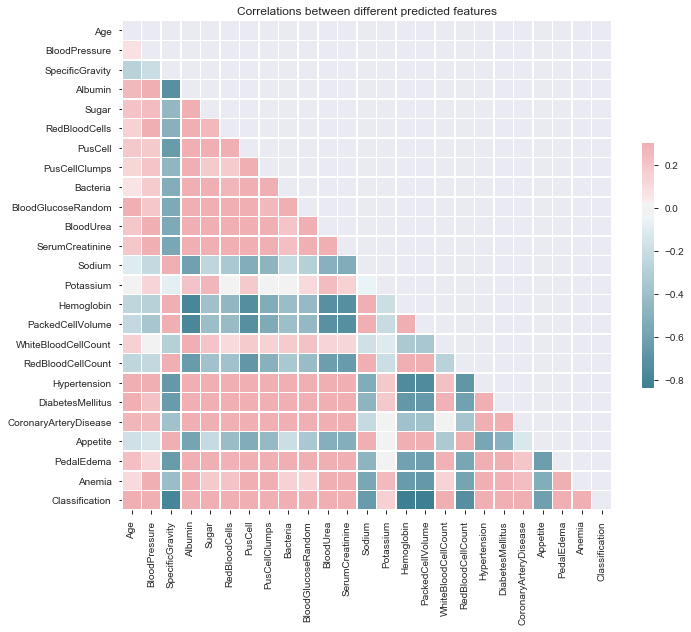

In [96]:
ckd_data_df_corr = ckd_data_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(ckd_data_df_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(ckd_data_df_corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

plt.title('Correlations between different predicted features')
plt.show()

<a id=section302></a>
#### Heat Map and Correlation of parameters after data cleaning

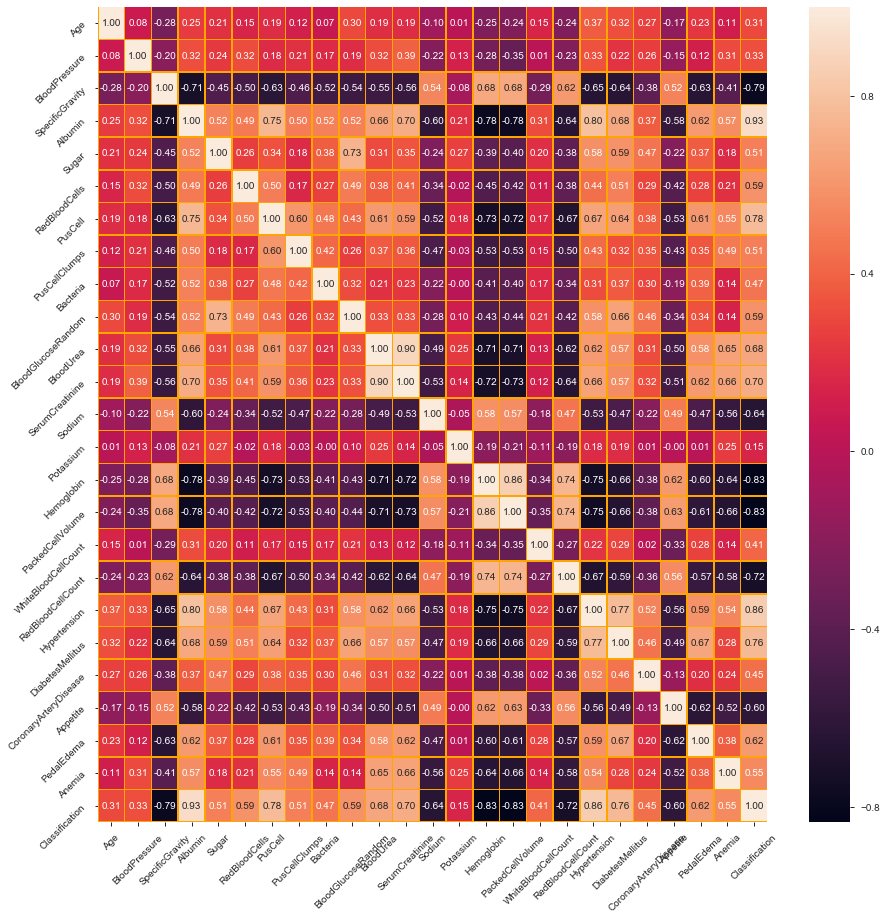

In [97]:
f,ax = plt.subplots(figsize=(15,15))
sb.heatmap(ckd_data_df.corr(), annot = True, fmt = ".2f", ax = ax, linewidths = 0.5, linecolor = "orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<a id=section303></a>
### Below Pairwise plots will provide the features that are having correlattion with target variable.

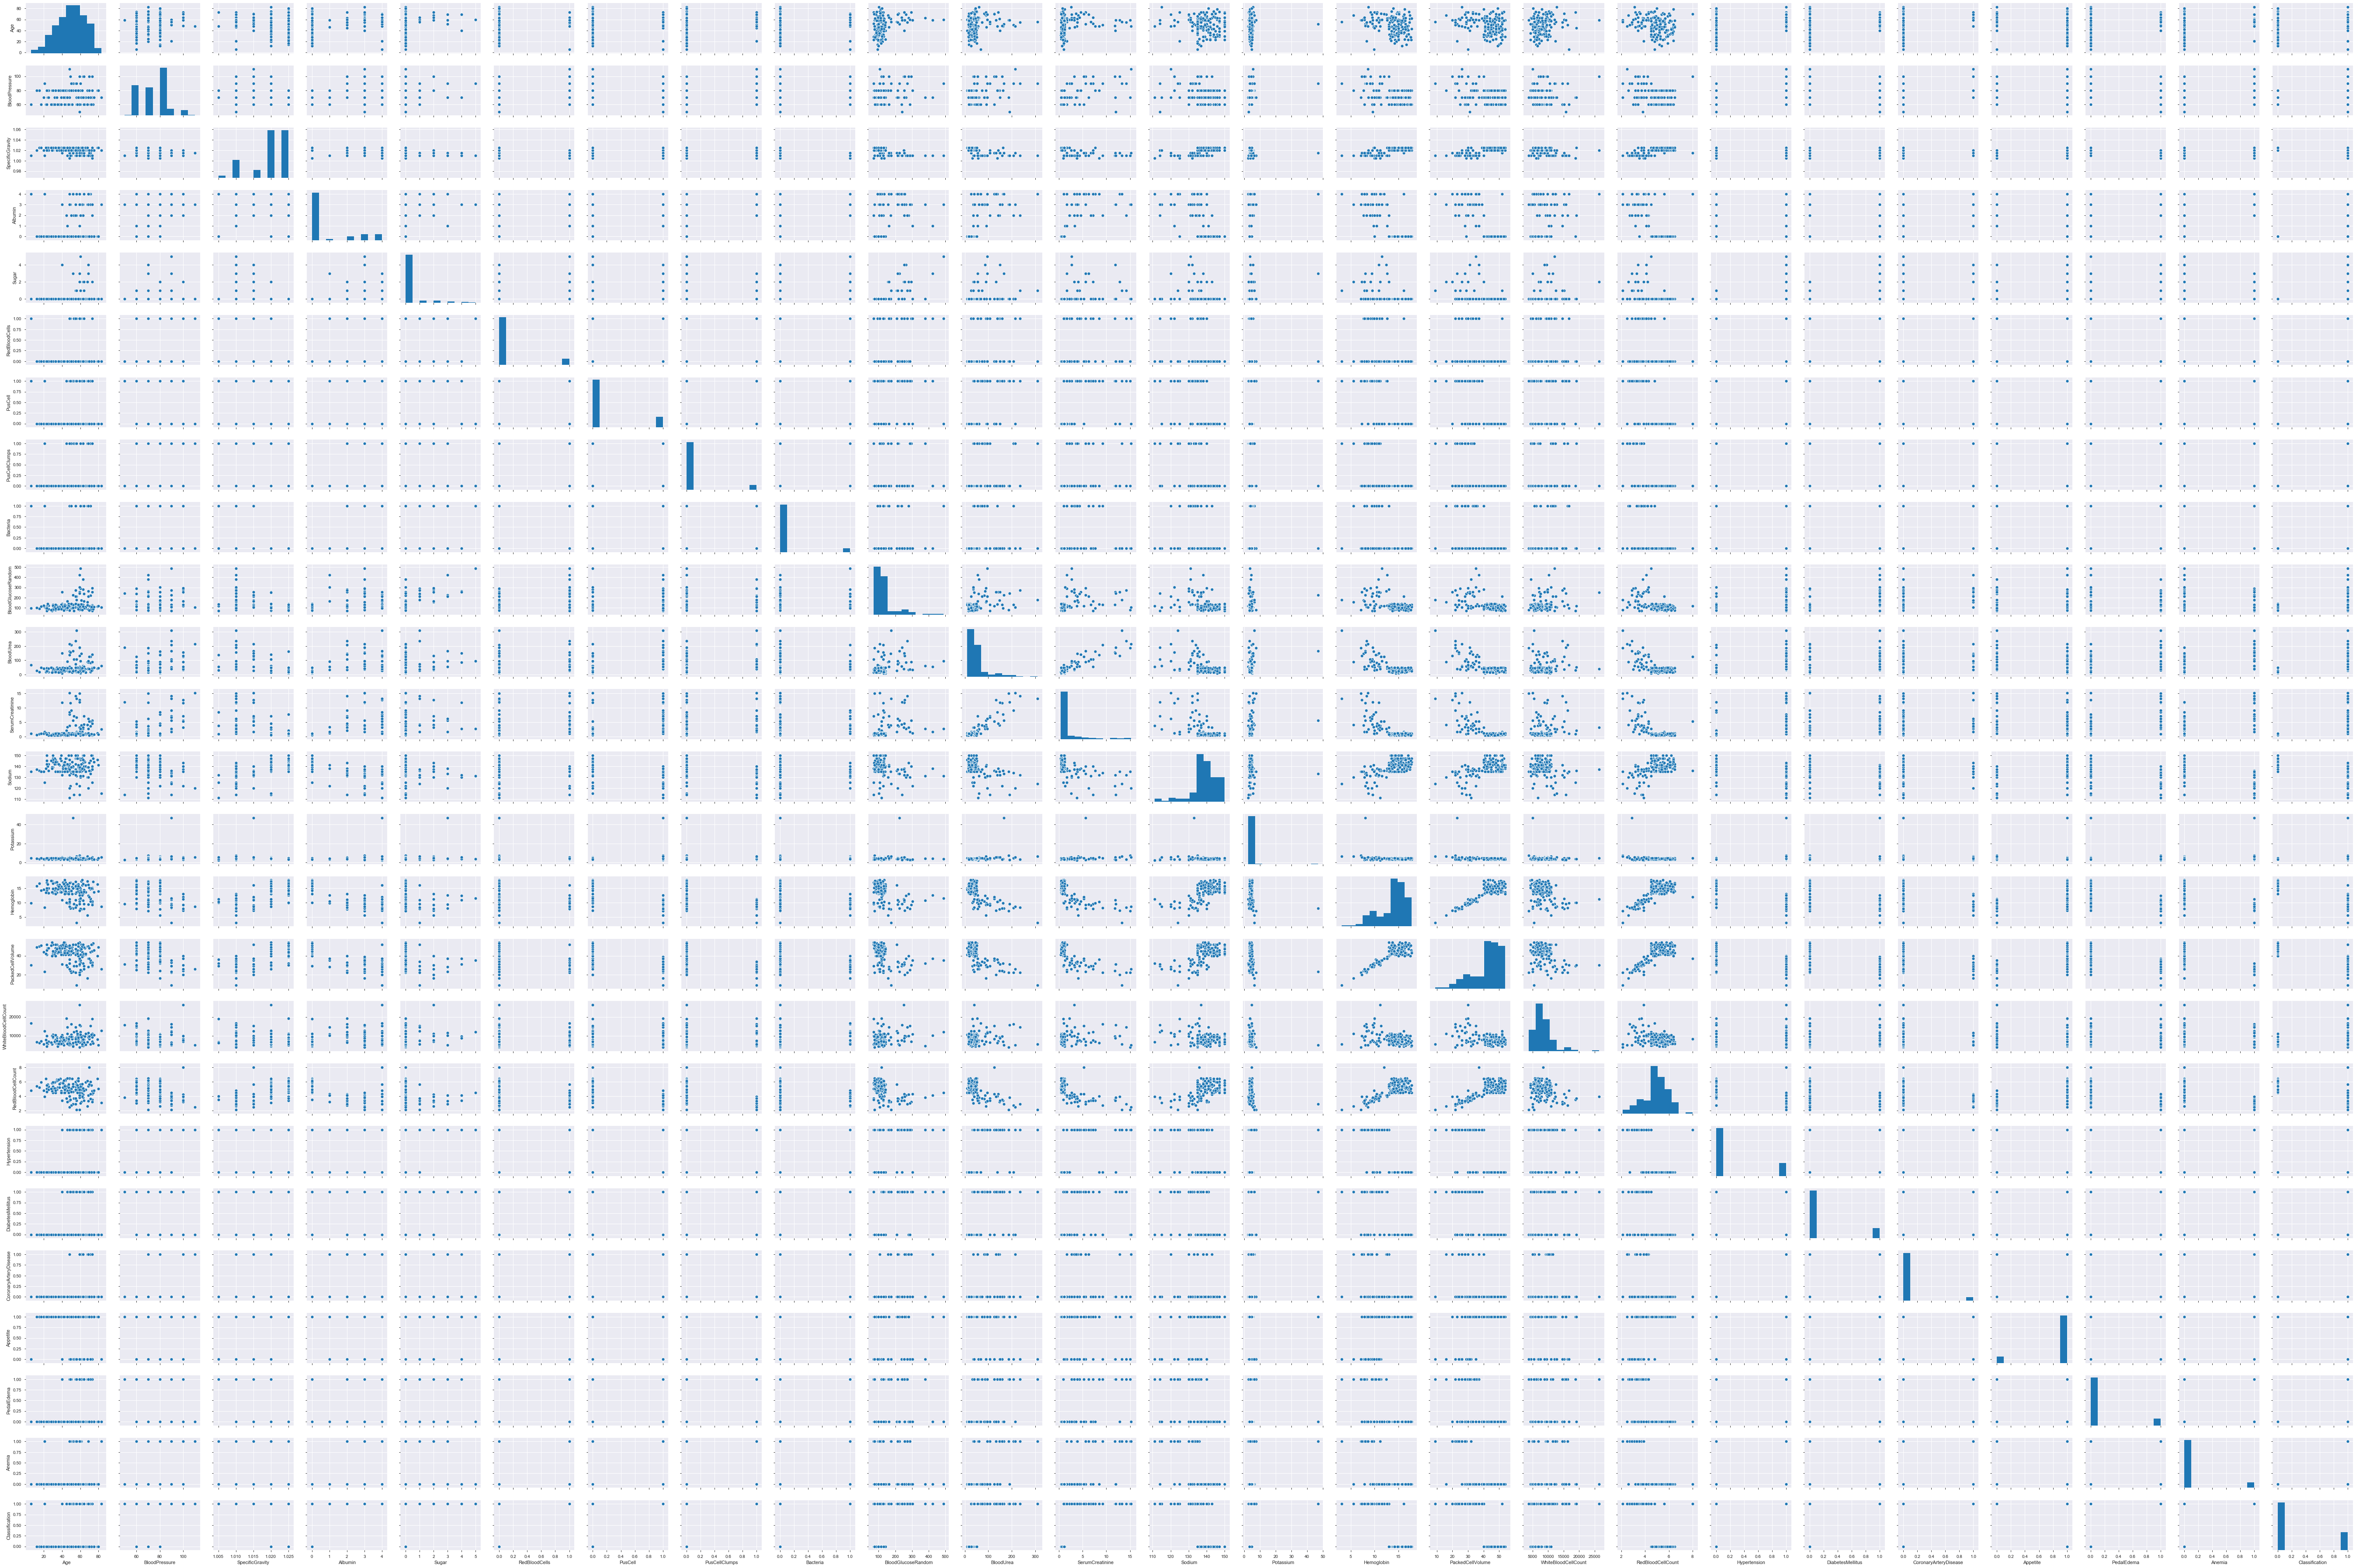

In [98]:
sb.pairplot(ckd_data_df, height = 2, aspect = 1.5)

<a id=section304></a>
### Histograms

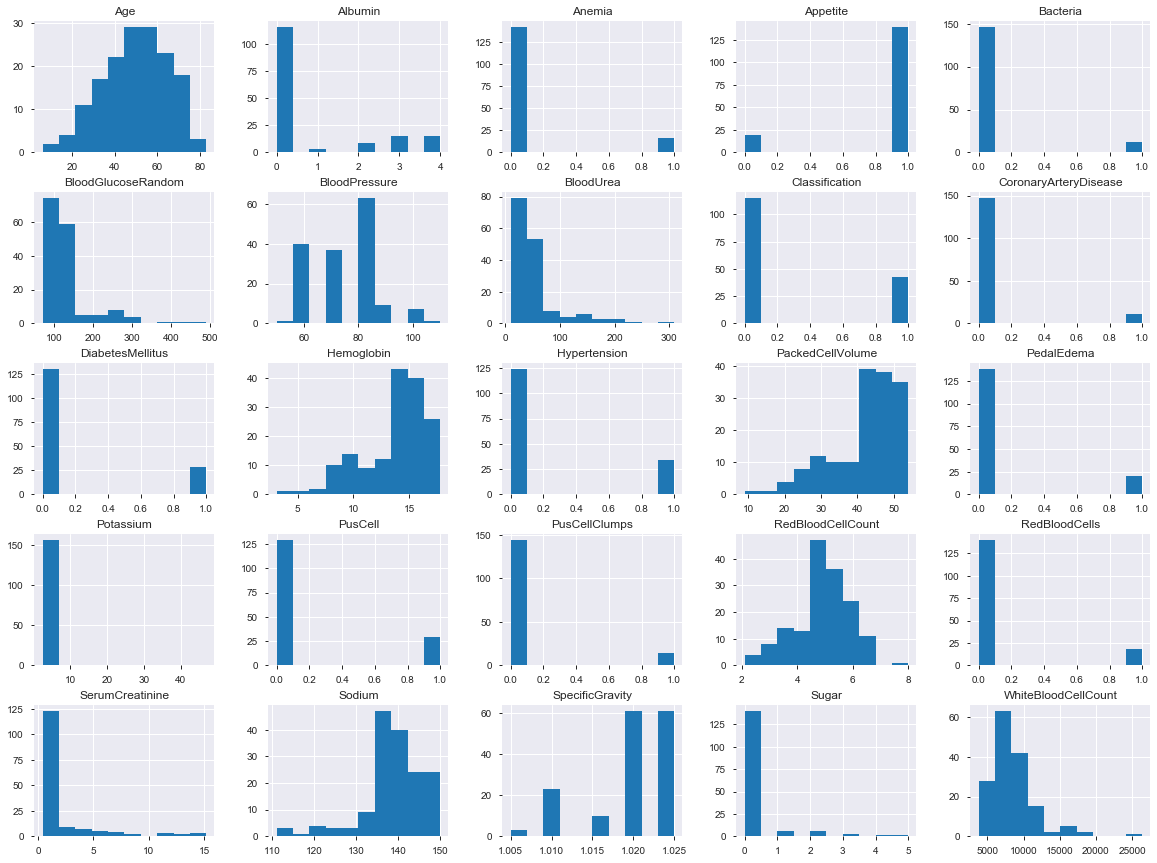

In [99]:
num_bins = 10
ckd_data_df.hist(bins = num_bins, figsize = (20,15))
#plt.savefig("Dataset/loandata_histogram_plots")
plt.show()

<a id=section304></a>
### More Visualizations

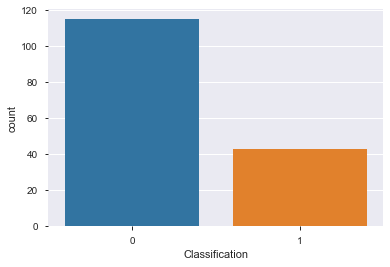

In [100]:
sb.countplot(ckd_data_df['Classification']);

Text(0.5, 1.0, 'General Statistics of Chornic Kidney Disease Dataset')

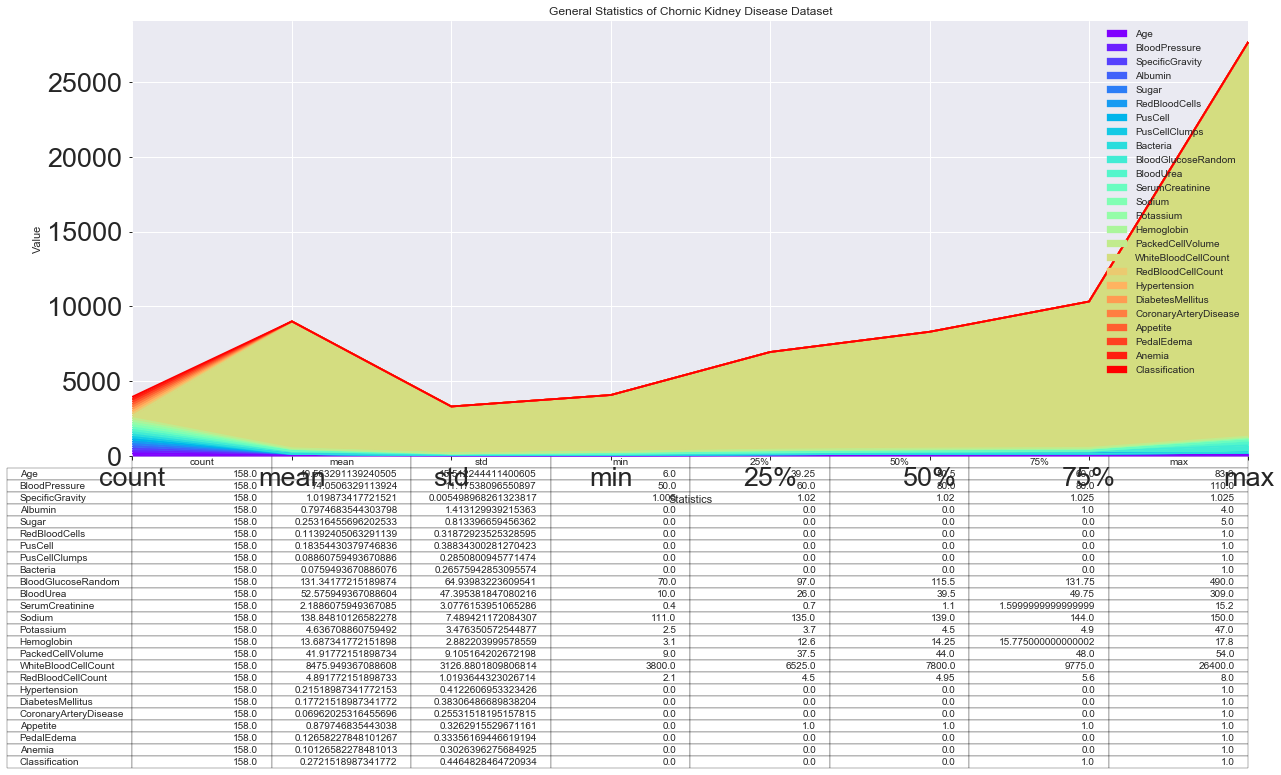

In [101]:
ckd_data_df.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Chornic Kidney Disease Dataset")

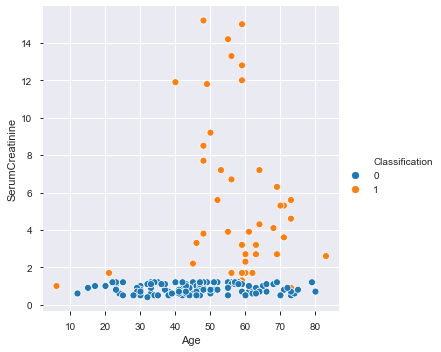

In [102]:
# As for Kidney, Serum Creatinine count is critical so examining it visually
sb.relplot(data = ckd_data_df, x = "Age", y = "SerumCreatinine", hue = "Classification")

From the above, we can say as the __Age__ increases the __Serum Creatinine__ will have impact on the CKD.

Other observation we can make is with the __Age__ and __CKD__.

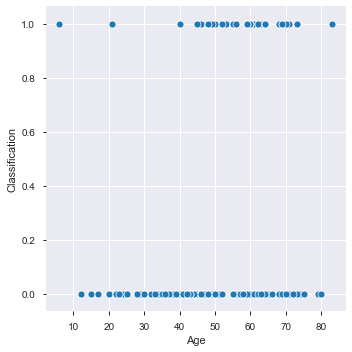

In [103]:
sb.relplot(x="Age",y="Classification",data=ckd_data_df)

Verifying the dataset for diabetic patients, it common to correlate __Age, Serum Cratinine, Diabetes Mellitus__ attributes for a patient

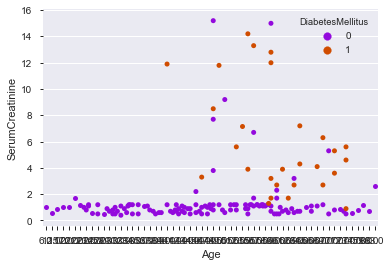

In [104]:
sb.swarmplot(x = "Age", y = "SerumCreatinine", hue = "DiabetesMellitus", palette = "gnuplot", data = ckd_data_df)

#### Verifying few attributes which are key for CKD for anomoly(outliers) detection

##### For Serum Creatinine

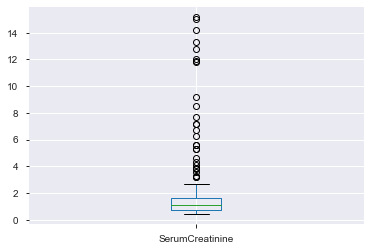

In [105]:
ckd_data_df.boxplot(column='SerumCreatinine')
plt.show()

##### Sodium

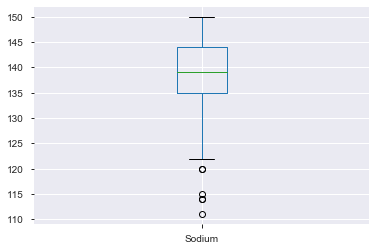

In [106]:
ckd_data_df.boxplot(column='Sodium')
plt.show()

##### Potassium

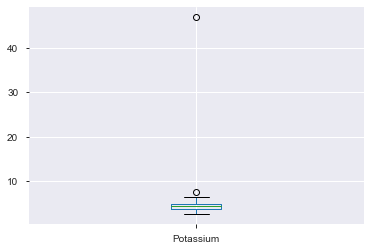

In [107]:
ckd_data_df.boxplot(column='Potassium')
plt.show()

<b> Check the correlations among the features <b>

In [108]:
ckd_data_df.corr()

,Age,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCells,PusCell,PusCellClumps,Bacteria,BloodGlucoseRandom,...,PackedCellVolume,WhiteBloodCellCount,RedBloodCellCount,Hypertension,DiabetesMellitus,CoronaryArteryDisease,Appetite,PedalEdema,Anemia,Classification
Age,1.000000,0.079712,-0.277303,0.253380,0.207711,0.147971,0.188907,0.124032,0.068353,0.301915,...,-0.235116,0.153132,-0.242235,0.372348,0.323957,0.269868,-0.170259,0.232327,0.105809,0.305119
BloodPressure,0.079712,1.000000,-0.198897,0.322507,0.243828,0.316670,0.179834,0.206507,0.174555,0.190113,...,-0.353504,0.008274,-0.228533,0.334951,0.218096,0.257709,-0.145047,0.117878,0.311097,0.326567
SpecificGravity,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,-0.500494,-0.630323,-0.460050,-0.516392,-0.544781,...,0.678472,-0.288930,0.619092,-0.648168,-0.639391,-0.379305,0.523944,-0.633622,-0.413252,-0.790102
Albumin,0.253380,0.322507,-0.712331,1.000000,0.521448,0.489941,0.752956,0.503341,0.516104,0.518123,...,-0.775528,0.314574,-0.640099,0.796876,0.678582,0.374755,-0.578080,0.622268,0.569529,0.925816
Sugar,0.207711,0.243828,-0.448477,0.521448,1.000000,0.256568,0.335901,0.177327,0.381929,0.730050,...,-0.404821,0.201000,-0.377726,0.577286,0.591010,0.466658,-0.220547,0.374128,0.179811,0.510615
RedBloodCells,0.147971,0.316670,-0.500494,0.489941,0.256568,1.000000,0.498959,0.168592,0.273177,0.493857,...,-0.422537,0.108857,-0.379378,0.442400,0.511777,0.293269,-0.418639,0.282868,0.209797,0.586391
PusCell,0.188907,0.179834,-0.630323,0.752956,0.335901,0.498959,1.000000,0.600092,0.481227,0.430646,...,-0.718042,0.169936,-0.667113,0.666767,0.636288,0.384223,-0.528435,0.606234,0.545380,0.775388
PusCellClumps,0.124032,0.206507,-0.460050,0.503341,0.177327,0.168592,0.600092,1.000000,0.415033,0.257768,...,-0.534564,0.146742,-0.499401,0.432876,0.321900,0.352255,-0.432515,0.350171,0.485941,0.509915
Bacteria,0.068353,0.174555,-0.516392,0.516104,0.381929,0.273177,0.481227,0.415033,1.000000,0.318095,...,-0.397500,0.170071,-0.343299,0.314961,0.367477,0.297063,-0.187815,0.393819,0.141344,0.468845
BloodGlucoseRandom,0.301915,0.190113,-0.544781,0.518123,0.730050,0.493857,0.430646,0.257768,0.318095,1.000000,...,-0.443818,0.212093,-0.418085,0.579407,0.663012,0.459164,-0.338924,0.336141,0.139854,0.591217


<a id=section4></a>
### 4. Model Training and Prediction

In [109]:
ckd_data_df.shape

(158, 25)

 <a id=section401></a>
#### Splitting X and y into training and test datasets

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [111]:
X = ckd_data_df.drop('Classification', axis = 1)
y = ckd_data_df['Classification']

#Normalization
#x = (X-np.min(X))/(np.max(X)-np.min(X))

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)

sScalar = StandardScaler()
sScalar.fit(x_train)
x_train_scaled = sScalar.transform(x_train)

x_test_scaled = sScalar.transform(x_test)


Verify the datasets

In [112]:
x_train_scaled.shape, y_train.shape

((110, 24), (110,))

In [113]:
x_test_scaled.shape, y_test.shape

((48, 24), (48,))

<a id=section402></a>
#### Applying Logistic Regression.

In [114]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

#10-fold cross validation. LogisticRegressionCV has build in cross validation property
#logreg = LogisticRegression()
logreg = LogisticRegressionCV(cv = 10, solver='liblinear', penalty='l2')

fitted_model = logreg.fit(x_train_scaled, y_train)

print("test accuracy {}".format(logreg.score(x_test_scaled, y_test)))

test accuracy 1.0


Confusion Matrix

In [115]:
from sklearn.metrics import confusion_matrix

y_predict = logreg.predict(x_test_scaled)
y_true = y_test

cm = confusion_matrix(y_true, y_predict)

pred_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
pred_results.head()

,Actual,Predicted
29,1,1
107,0,0
14,1,1
81,0,0
124,0,0


Confusion Matrix on Heatmap

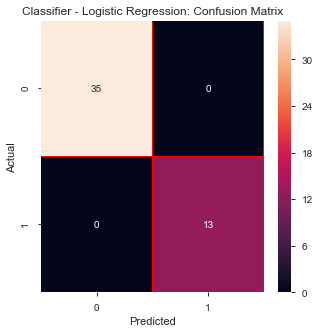

In [116]:
f, ax = plt.subplots(figsize = (5,5))
sb.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Classifier - Logistic Regression: Confusion Matrix")
plt.show()

<a id=section403></a>
#### Calculating Precision, Recall, F1, Average Precision scores

In [117]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import sklearn

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1score = f1_score(y_test, y_predict, average = "macro")

print('F1 Score is---->', f1score)
print('Accuracy Score is--->:', accuracy)
print('Precision Score is--->:', precision)
print('Recall Score is--->:', recall)

F1 Score is----> 1.0
Accuracy Score is--->: 1.0
Precision Score is--->: 1.0
Recall Score is--->: 1.0


##### logistic regression equation.

In [118]:
# For theta_0:
print('Intercept:', fitted_model.intercept_ )
# For theta_1 and theta_2:
print('Coefficient:', fitted_model.coef_ )

#Intercept: [0.06871589]
#Coefficient: [[ 0.78383815  1.16041673 -2.74689683  3.38511928  0.25200383  2.60482758
#   1.11288668  0.26940185  0.7837258   0.46476806  0.6561838   0.82156468
#  -1.08337774  0.05618586 -1.52695244 -1.57267094  0.86011875 -0.80744856
#   3.01693133  1.92463761  0.52555206 -0.66830377  0.44904356  0.50909748]]




Intercept: [-0.00249307]
Coefficient: [[ 0.00154289  0.00134859 -0.00387862  0.00433104  0.00245526  0.00272406
   0.00354649  0.00216721  0.00217459  0.00289427  0.00319884  0.00324016
  -0.00315246  0.00075403 -0.00404221 -0.00399878  0.00236583 -0.00324098
   0.00422025  0.00377394  0.00217219 -0.00284154  0.00283377  0.00230907]]


__Logistic Equation__

__y = fitted_model.intercept_ + fitted_model.coef_[0] '*' Age__  
Likewise this equation would contain all the features.

In [119]:
list(zip(x_train.columns, abs(fitted_model.coef_[0]).tolist()))

[('Age', 0.0015428851394485995),
 ('BloodPressure', 0.0013485859116662792),
 ('SpecificGravity', 0.0038786207103708725),
 ('Albumin', 0.004331039208004358),
 ('Sugar', 0.0024552563743788806),
 ('RedBloodCells', 0.002724063779050774),
 ('PusCell', 0.003546491838355659),
 ('PusCellClumps', 0.0021672126505070904),
 ('Bacteria', 0.0021745876233524616),
 ('BloodGlucoseRandom', 0.002894267662612254),
 ('BloodUrea', 0.003198836476247014),
 ('SerumCreatinine', 0.0032401583151632474),
 ('Sodium', 0.0031524607299273162),
 ('Potassium', 0.0007540299109498605),
 ('Hemoglobin', 0.004042208941904571),
 ('PackedCellVolume', 0.003998781594523441),
 ('WhiteBloodCellCount', 0.002365827688577338),
 ('RedBloodCellCount', 0.003240977158222041),
 ('Hypertension', 0.004220246935642967),
 ('DiabetesMellitus', 0.0037739351110076063),
 ('CoronaryArteryDisease', 0.002172186564552305),
 ('Appetite', 0.002841535061777185),
 ('PedalEdema', 0.002833768223465005),
 ('Anemia', 0.002309065700300604)]

#### __From the above, we can conclude that <font color='blue'>Albumin and Hyper Tension </font> features results in Chronic Kidney Disease__

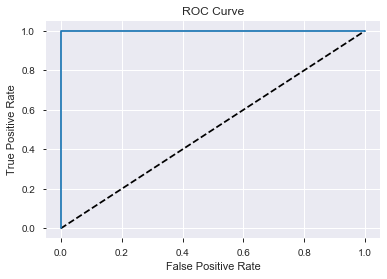

In [120]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<a id=section404></a>
#### Manual test the above accuracy, precision and recall which learned in previous semeter DM class.

In [121]:
ckddata_crosstab = pd.crosstab(pred_results.Predicted, pred_results.Actual)

ckddata_crosstab

Actual,0,1
Predicted,,
0,35,0
1,0,13


In [122]:
TP = ckddata_crosstab[1][1]
TN = ckddata_crosstab[0][0]
FP = ckddata_crosstab[0][1]
FN = ckddata_crosstab[1][0]

In [123]:
manual_accuracy_score_verified = (TP + TN) / (TP + FP + TN + FN)

manual_accuracy_score_verified

1.0

In [124]:
manual_precision_score_ckd_class = TP / (TP + FP)

manual_precision_score_ckd_class

1.0

In [125]:
manual_recall_score_ckd_class = TP / (TP + FN)

manual_recall_score_ckd_class

1.0

<a id=section405></a>
#### Comparing accuracy, precision and recall of MANUAL with scikit-learn values.

In [126]:
print('scikit-learn Accuracy Score is--->:', accuracy)
print('Manual Accuracy Score is--->:', manual_accuracy_score_verified)

print('scikit-learn Precision Score is--->:', precision)
print('Manual Precision Score is--->:', manual_precision_score_ckd_class)

print('scikit-learn Recall Score is--->:', recall)
print('Manual Recall Score is--->:', manual_recall_score_ckd_class)

scikit-learn Accuracy Score is--->: 1.0
Manual Accuracy Score is--->: 1.0
scikit-learn Precision Score is--->: 1.0
Manual Precision Score is--->: 1.0
scikit-learn Recall Score is--->: 1.0
Manual Recall Score is--->: 1.0


<a id=section406></a>
### Decision Boundry


__The prediction function returns a probability score between 0 and 1. If you want to map the discrete class (true/false, yes/no), you will have to select a threshold value above which you will be classifying values into class 1 and below the threshold value into class 2.__

For example, suppose the threshold value is 0.5 and your prediction function returns 0.7, it will be classified as positive. If your predicted value is 0.2, which is less than the threshold value, it will be classified as negative. For logistic regression with multiple classes we could select the class with the highest predicted probability.

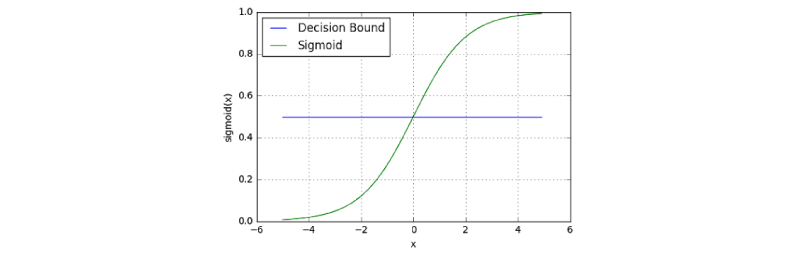

##### The cost for all the training examples denoted by J(θ) can be computed by taking the average over the cost of all the training samples

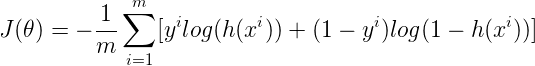

###### where m is the number of training samples

##### We will use gradient descent to minimize the cost function. The gradient w.r.t any parameter can be given by

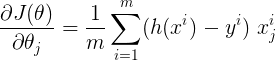

#### Regarding plotting of decision boundary:

- We had discussed with <font color=blue>__Prof. Surya Prakash__</font> about features which needs to be considered for plotting decision boundary for multi-featuers (24 in this case) for Logistic Regression. He has suggested two options
    - Using PCA (Dimensional reduction to 2 features) and plot the decision boundary or
    - Consider the two highest coefficients (theta) value for the features and plot the decision boundary.
    
#### From the above, we have already noticed that 'HyperTension' and 'Albumin' have the highest coffecients and these two contribute to the CKD.  So these two have been considered for plotting decision boundary.

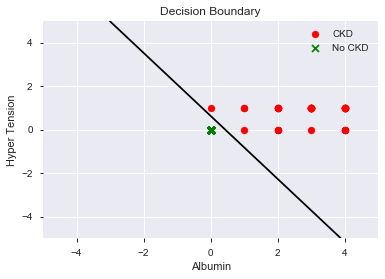

In [127]:
# get true and false of CKD values for plotting
pos = ckd_data_df['Classification'] == 1
neg = ckd_data_df['Classification'] == 0

# define function to map higher order polynomial features
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res

X = [ckd_data_df.Albumin, ckd_data_df.Hypertension]
degree = 1
X_poly = mapFeature(X[0], X[1], degree)
y = ckd_data_df.Classification

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costFunc(theta, X, y):
    m = y.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    term1 = y * np.log(h)
    term2 = (1- y) * np.log(1 - h)
    J = -np.sum(term1 + term2, axis = 0) / m
    return J

initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

from scipy.optimize import minimize
res = minimize(costFunc, initial_theta, args=(X_poly, y))

theta = res.x.reshape(res.x.shape[0], 1)

def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-5, 5, 5)
    v = np.linspace(-5, 5, 5)
    U,V = np.meshgrid(u,v)
    
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['CKD', 'No CKD', 'Decision Boundary'])
    return cs

# Plot Decision boundary
fig, axes = plt.subplots();
axes.set_xlabel('Albumin')
axes.set_ylabel('Hyper Tension')
plt.title('Decision Boundary')
axes.scatter(ckd_data_df.loc[pos, 'Albumin'], ckd_data_df.loc[pos, 'Hypertension'], color = 'r', marker='o', label='CKD')
axes.scatter(ckd_data_df.loc[neg, 'Albumin'], ckd_data_df.loc[neg, 'Hypertension'], color = 'g', marker='x', label='No CKD')
axes.legend(title='Legend', loc = 'best' )
axes.set_xlim(-5,5)
axes.set_xlim(-5,5)

plotDecisionBoundary(theta, degree, axes)

<a id=section406></a>
#### Output to CSV file
- Output .csv file consisting actual Test set values of Y (column name: Actual) and Predictions of Y(column name: Predicted).

In [128]:
pred_results.to_csv("Dataset/output.csv", index = None)

<a id=section5></a>
## 5. Conclusion & Inferences

1. Dataset (https://www.kaggle.com/mansoordaku/ckdisease) provided in the assignment is very small.

2. After dropping out the uncessary/irrelavent data like
    - Columns which have NaN
    - Columns which were having null
    - Columns which were data is not consistent
    - Columns which have tab
    - Columns which have less importance

The size of the dataset reduced to 70%, rest of the 30% have been removed by considering the above issues.
  
3. We tried using Mean, Median etc normalization/transformation techniques to see if there is any impact on the Accuracy score. With and without these techniques we were resulted with 100% accuracy. And also, Dataset is also very small.

4. All features were correlation with predicted feature. Albumin and Hypertension feature where having more influence for predicting Chornic Kidney Disease.

5. For having the Decision Boundary, we decided to plot it using the two features which had more influence on predicting Chronic Kidney Disease. We considered this decision using the coefficients of the features.

6. Understood the Logical Regression now can provide pros and cons of it. Below are two pros and cons.

    -__Pros__
        - The Logistic Regression model not only acts as a classification model, but also gives you probabilities.
        - Logistic Regression not only gives a measure of how relevant a predictor (coefficient size) is, but also its direction of association (positive or negative). 
    __Cons__
        - Logistic Regression can suffer from complete separation.
        - Logistic Regression is less prone to overfitting.

